<a href="https://colab.research.google.com/github/NAVEED261/MY-AI-ASSISTANT/blob/main/practice_of_command.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%%capture
%pip install langgraph

In [6]:
from langgraph.graph import StateGraph, START
from langgraph.graph.state import CompiledStateGraph
from langgraph.graph.message import add_messages
from IPython.display import Image
import random
from typing import TypedDict, Literal, Optional, Annotated
from langgraph.types import Command

In [8]:
class state(TypedDict):
  address:str
  near_by_home:Optional[list[dict]]  # Change this line
  messages:Annotated[list, add_messages]

In [12]:
from langchain_core.messages import AIMessage ,HumanMessage

In [18]:
def node_A(state:state)->Command[Literal["search by near home","question and answer"]]:
  print("called A")
  value = random.choices(["search by near home","question and answer"])
  if value == "search by near home":
    goto  = "search by near home"
  else:
    goto = "question and answer"
  return Command(goto=goto)
def search_by_near_home(state:state):
  print("called search by near home")
  return{"near_by_home":[{"home 1":"fatima zehra hosue"},{"home 2" : "umaima gul hosue"}]}
def question_and_answer(state:state):
  print("called question and answer")
  return{"messages":[AIMessage(content="system is drop due to internet connection plz try again letter")]}

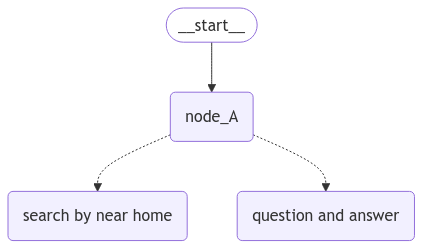

In [19]:
builder = StateGraph(state)
builder.add_node("node_A",node_A)
builder.add_node("search by near home",search_by_near_home)
builder.add_node("question and answer",question_and_answer)
builder.add_edge(START,"node_A")
graph =builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))


In [21]:
responst = graph.invoke({"address":"Karachi"})
print("\n[FINAL RESPONSE]\n", responst)

called A
called question and answer

[FINAL RESPONSE]
 {'address': 'Karachi', 'messages': [AIMessage(content='system is drop due to internet connection plz try again letter', additional_kwargs={}, response_metadata={}, id='1f830784-7848-4eac-88bd-a3fa901886ab')]}


In [37]:
class State(TypedDict):
    address: str # address where user wants to search homes for.
    nearby_homes: Optional[list[dict]] # list of nearby homes
    messages: Annotated[list, add_messages]
    user_data: Optional[dict] # user data - for registered users we already have this

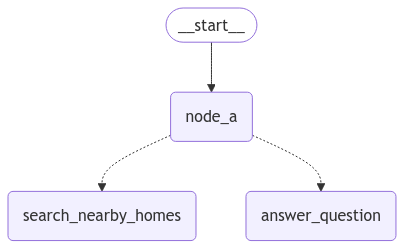

In [38]:

# Define the nodes (agents)

def node_a(state: state) -> Command[Literal["search_nearby_homes", "answer_question"]]:
    print("Called A")

    # Get User Data From Memory or Data Store
    fetched_user_data = {"name": "fatima zehra"}

    # THis is where llm decides which node shall I go next
    value = random.choice(["search_nearby_homes", "answer_question"])

    # This is a replacement for a conditional edge function
    if value == "search_nearby_homes":
        goto = "search_nearby_homes"
    else:
        goto = "answer_question"

    # note how Command allows you to BOTH update the graph state AND route to the next node
    return Command(
        update={"user_data": fetched_user_data},
        # this is a replacement for an edge
        goto=goto,
    )


# Nodes search_nearby_homes and answer_question are unchanged (just like before)
def search_nearby_homes(state: state):
    print("Called search_nearby_homes!")
    print("UserInfo", state["user_data"])
    return {"nearby_homes": [{"home_1": "fatima zehra"}, {"home_2": "umaima gul"}]}


def answer_question(state: state):
    print("Called answer_question")
    print("UserInfo", state["user_data"])
    user_name = state["user_data"].get("name", "Guest")
    return {"messages": [AIMessage(content=f"Hi, {user_name} Welcome to Homes AI Search Engine")]}


builder = StateGraph(state)
builder.add_edge(START, "node_a")
builder.add_node(node_a)
builder.add_node(search_nearby_homes)
builder.add_node(answer_question)
# NOTE: there are no edges between nodes A, B and C!

graph = builder.compile()


from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))



In [39]:
response = graph.invoke({"address": "Karachi"})

print("\n[FINAL RESPONSE]\n", response)


Called A
Called search_nearby_homes!
UserInfo {'name': 'fatima zehra'}

[FINAL RESPONSE]
 {'address': 'Karachi', 'messages': [], 'user_data': {'name': 'fatima zehra'}}


In [40]:
class State(TypedDict):
    address: str # address where user wants to search homes for.
    nearby_homes: Optional[list[dict]] # list of nearby homes
    messages: Annotated[list, add_messages]
    user_data: Optional[dict] # user data - for registered users we already have this

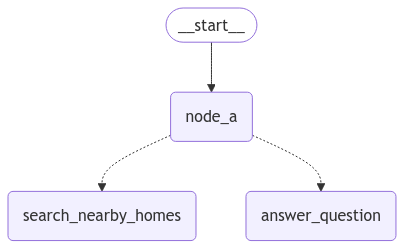

In [41]:

# Define the nodes (agents)

def node_a(state: state) -> Command[Literal["search_nearby_homes", "answer_question"]]:
    print("Called A")

    # Get User Data From Memory or Data Store
    fetched_user_data = {"name": "fatima zehra"}


    return Command(
        update={"user_data": fetched_user_data},
        # this is a replacement for an edge
        goto=["search_nearby_homes", "answer_question"]
    )


# Nodes search_nearby_homes and answer_question are unchanged (just like before)
def search_nearby_homes(state: state):
    print("Called search_nearby_homes!")
    print("UserInfo", state["user_data"])
    return {"nearby_homes": [{"home_1": "fatima zehra"}, {"home_2": "umaima gul"}]}


def answer_question(state: state):
    print("Called answer_question")
    print("UserInfo", state["user_data"])
    user_name = state["user_data"].get("name", "Guest")
    return {"messages": [AIMessage(content=f"Hi, {user_name} Welcome to Homes AI Search Engine")]}


builder = StateGraph(state)
builder.add_edge(START, "node_a")
builder.add_node(node_a)
builder.add_node(search_nearby_homes)
builder.add_node(answer_question)
# NOTE: there are no edges between nodes A, B and C!

graph = builder.compile()


from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))



In [42]:
agent_response = graph.invoke({"address": "Karachi"})

print("\n[FINAL RESPONSE]\n", agent_response)

Called A
Called search_nearby_homes!
UserInfo {'name': 'fatima zehra'}
Called answer_question
UserInfo {'name': 'fatima zehra'}

[FINAL RESPONSE]
 {'address': 'Karachi', 'messages': [AIMessage(content='Hi, fatima zehra Welcome to Homes AI Search Engine', additional_kwargs={}, response_metadata={}, id='6f36f744-3bba-419f-8917-46fe7938a418')], 'user_data': {'name': 'fatima zehra'}}
